In [1]:
import import_ipynb
import preprocess_model
import numpy as np
import math

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Reshape


importing Jupyter notebook from preprocess_model.ipynb
Shape: (1316, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Total Population                            1316 non-null   float64
 1   Female Population                           1316 non-null   float64
 2   Male Population                             1316 non-null   float64
 3   Birth Rate                                  1269 non-null   float64
 4   Death Rate                                  1269 non-null   float64
 5   Compulsory Education Dur.                   1041 non-null   float64
 6   Employment in Industry(%)                   1267 non-null   float64
 7   Employment in Agriculture(%)                1267 non-null   float64
 8   Female Employment in Agriculture(%)         1267 non-null   float64
 9   Female Emplo

In [2]:
df = pd.read_csv('./data/new_data_asia.csv')

In [3]:
numerical_features = ['School enrollment, primary', 'School enrollment, tertiary', 'Primary completion rate', 'Year']
categorical_features = ['Country']
target = 'Literacy rate'

# Drop rows with missing target values
df.dropna(subset=[target], inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from keras.models import Model
from keras.layers import Input, SimpleRNN, Dense, Concatenate
import numpy as np

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(




Epoch 1/200

3/3 [==============================] - 3s 327ms/step - loss: 8845.7168 - val_loss: 9204.3428
Epoch 2/200
3/3 [==============================] - 0s 53ms/step - loss: 8823.9619 - val_loss: 9181.7656
Epoch 3/200
3/3 [==============================] - 0s 55ms/step - loss: 8799.3213 - val_loss: 9153.1221
Epoch 4/200
3/3 [==============================] - 0s 50ms/step - loss: 8763.7363 - val_loss: 9094.2676
Epoch 5/200
3/3 [==============================] - 0s 43ms/step - loss: 8645.1201 - val_loss: 8643.6426
Epoch 6/200
3/3 [==============================] - 0s 52ms/step - loss: 7393.7334 - val_loss: 3401.4407
Epoch 7/200
3/3 [==============================] - 0s 51ms/step - loss: 6098.7852 - val_loss: 841.4966
Epoch 8/200
3/3 [==============================] - 0s 49ms/step - loss: 1522.8229 - val_loss: 4634.8213
Epoch 9/200
3/3 [==============================] - 0s 51ms/step - loss: 5246.2012 - val_loss: 6797.9961
Epoch 10/200
3/3 [==============================] - 0s 42ms/s

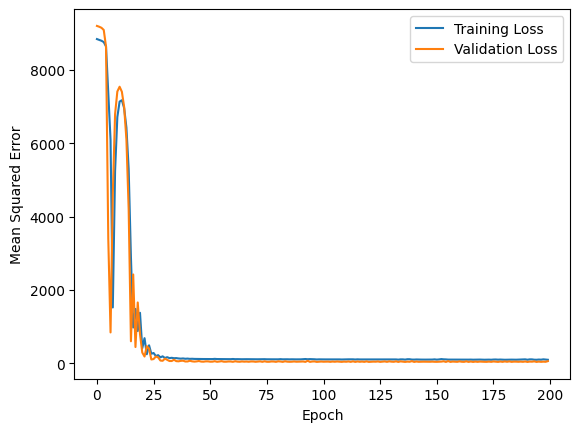

In [5]:
# Label Encoding for categorical features
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# One-Hot Encoding for categorical features
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_cat_encoded = one_hot_encoder.fit_transform(df[categorical_features])

# Standard Scaling for numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[numerical_features])

# Concatenate numerical and categorical features
X = np.concatenate((X_cat_encoded, X_num_scaled), axis=1)
y = df[target]

# Split the data into train, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Split numerical and categorical features in train, validation, and test sets
X_cat_train, X_num_train = X_train[:, :len(categorical_features)], X_train[:, len(categorical_features):]
X_cat_val, X_num_val = X_val[:, :len(categorical_features)], X_val[:, len(categorical_features):]
X_cat_test, X_num_test = X_test[:, :len(categorical_features)], X_test[:, len(categorical_features):]


# Reshape the numerical data if necessary
if len(X_num_train.shape) == 2:
    X_num_train = np.expand_dims(X_num_train, axis=2)
    X_num_val = np.expand_dims(X_num_val, axis=2)
    X_num_test = np.expand_dims(X_num_test, axis=2)


# Define model architecture
num_input = Input(shape=(X_num_train.shape[1], X_num_train.shape[2]))
rnn_layer = SimpleRNN(64, activation='relu')(num_input)

cat_input = Input(shape=(X_cat_train.shape[1],))
cat_output = Dense(64, activation='relu')(cat_input)

concatenated = Concatenate()([rnn_layer, cat_output])
output = Dense(1)(concatenated)

model = Model(inputs=[num_input, cat_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit([X_num_train, X_cat_train], y_train, epochs=200, batch_size=64,
                    validation_data=([X_num_val, X_cat_val], y_val), verbose=1)

# Evaluate the model on the test set
test_loss = model.evaluate([X_num_test, X_cat_test], y_test)
print(test_loss)
# Make predictions on the test set
predictions = model.predict([X_num_test, X_cat_test])


# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [6]:
print(predictions)


[[97.22916 ]
 [94.696335]
 [92.563576]
 [95.08424 ]
 [91.13716 ]
 [90.94841 ]
 [91.23555 ]
 [91.591324]
 [90.886375]
 [90.82758 ]
 [91.084274]
 [95.32727 ]
 [94.81914 ]
 [90.03023 ]
 [90.61529 ]
 [95.29439 ]
 [86.070175]
 [91.13441 ]
 [90.86705 ]
 [92.45632 ]
 [92.169174]
 [96.47025 ]
 [90.484634]
 [93.97064 ]
 [91.06822 ]
 [95.06213 ]
 [90.20294 ]
 [91.16212 ]
 [91.48506 ]
 [92.21704 ]
 [94.11405 ]
 [92.088646]
 [90.641655]
 [94.72719 ]
 [97.10251 ]
 [97.031845]
 [90.73162 ]
 [85.15408 ]
 [96.60632 ]
 [92.124084]
 [94.4756  ]]
